In [1]:
import os, sys
sys.path.append("..")

import torch
import numpy as np

from matplotlib import pyplot as plt

from torch.distributions.mixture_same_family import MixtureSameFamily
from torch.distributions.categorical import Categorical
from torch.distributions.multivariate_normal import MultivariateNormal

from sklearn.decomposition import PCA
from scipy.stats import ortho_group

from sklearn.decomposition import PCA
from src.gaussian_benchmark import GaussianBenchmark

In [7]:
DIM = 128
EPS = 1

benchmark = GaussianBenchmark(dim=DIM, eps=EPS, device="cpu")

In [8]:
pca = PCA(n_components=2)

X_samples, X_labels = benchmark.X_sampler.sample(10000)
Y_samples, Y_labels = benchmark.Y_sampler.sample(10000)
pca.fit(torch.cat((X_samples, Y_samples)))

X_pca_samples = pca.transform(X_samples)
Y_pca_samples = pca.transform(Y_samples)

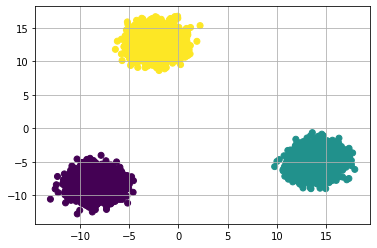

In [9]:
plt.scatter(X_pca_samples[:, 0], X_pca_samples[:, 1], c=X_labels)
plt.grid()

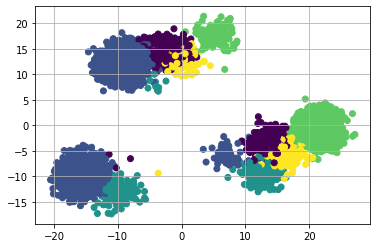

In [10]:
samples, labels = benchmark.Y_sampler.sample(10000)
plt.scatter(Y_pca_samples[:, 0], Y_pca_samples[:, 1], c=Y_labels)
plt.grid()